In [93]:
# Dependencies --- overadding, will cull later
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import hvplot.pandas 

# Csv files
csv2015_path = "Happiness Data/2015.csv"
csv2016_path = "Happiness Data/2016.csv"
csv2017_path = "Happiness Data/2017.csv"
csv2018_path = "Happiness Data/2018.csv"
csv2019_path = "Happiness Data/2019.csv"
csv2020_path = "Happiness Data/2020.csv"
csv2021_path = "Happiness Data/2021.csv"
csv2022_path = "Happiness Data/2022.csv"

time2020_path = "Happiness Data/TimeSeries2020.csv"
time2021_path = "Happiness Data/TimeSeries2021.csv"
time2022_path = "Happiness Data/TimeSeries2022.csv"

csv2015df = pd.read_csv(csv2015_path)
csv2016df = pd.read_csv(csv2016_path)
csv2017df = pd.read_csv(csv2017_path)
csv2018df = pd.read_csv(csv2018_path)
csv2019df = pd.read_csv(csv2019_path)
csv2020df = pd.read_csv(csv2020_path)
csv2021df = pd.read_csv(csv2021_path)
csv2022df = pd.read_csv(csv2022_path, decimal=",")

time2020df = pd.read_csv(time2020_path)
time2021df = pd.read_csv(time2021_path)
time2022df = pd.read_csv(time2022_path)

### Original df + column renames

In [2]:
csv2015df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
csv2016df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
csv2017df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
csv2017df = csv2017df.rename(columns={'Happiness.Rank':"Happiness Rank", 'Happiness.Score':"Happiness Score", 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 'Health..Life.Expectancy.':'Health (Life Expectancy)'})
csv2017df.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
csv2018df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
csv2018df = csv2018df.rename(columns={"Country or region":"Country",'Overall rank':"Happiness Rank", 'Score':"Happiness Score", 'GDP per capita':'Economy (GDP per Capita)', 'Healthy life expectancy':'Health (Life Expectancy)', "Freedom to make life choices":"Freedom"})
csv2018df.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [8]:
csv2019df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
csv2019df = csv2019df.rename(columns={"Country or region":"Country",'Overall rank':"Happiness Rank", 'Score':"Happiness Score", 'GDP per capita':'Economy (GDP per Capita)', 'Healthy life expectancy':'Health (Life Expectancy)', "Freedom to make life choices":"Freedom"})
csv2019df.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [10]:
csv2020df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [11]:
csv2020df = csv2020df.rename(columns={"Country name":"Country", 'Ladder score':"Happiness Score", 'Explained by: Log GDP per capita':'Economy (GDP per Capita)', 'Explained by: Healthy life expectancy':'Health (Life Expectancy)', "Explained by: Freedom to make life choices":"Freedom"})
csv2020df.head()

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Economy (GDP per Capita),Explained by: Social support,Health (Life Expectancy),Freedom,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [12]:
csv2021df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [13]:
csv2021df = csv2021df.rename(columns={"Country name":"Country", 'Ladder score':"Happiness Score", 'Explained by: Log GDP per capita':'Economy (GDP per Capita)', 'Explained by: Healthy life expectancy':'Health (Life Expectancy)', "Explained by: Freedom to make life choices":"Freedom"})
csv2021df.head()

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Economy (GDP per Capita),Explained by: Social support,Health (Life Expectancy),Freedom,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [14]:
csv2022df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [15]:
csv2022df = csv2022df.rename(columns={"RANK":"Happiness Rank", 'Happiness score':"Happiness Score",'Explained by: GDP per capita':'Economy (GDP per Capita)', 'Explained by: Healthy life expectancy':'Health (Life Expectancy)', "Explained by: Freedom to make life choices":"Freedom"})
csv2022df.head()

,Happiness Rank,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Economy (GDP per Capita),Explained by: Social support,Health (Life Expectancy),Freedom,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [16]:
time2020df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2089,2105,2126,2135,2148,2158,2170,2182,2189,2189
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1111,1117,1125,1134,1143,1153,1164,1170,1174,1181
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2687,2696,2705,2716,2722,2728,2737,2745,2751,2756
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,82,82,83,83,83,83,83,84,84,84
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,393,393,393,396,399,399,403,403,405,405


In [17]:
time2020df = time2020df.rename(columns={"Country/Region":"Country", "1/22/2020":"Start of the Year: Covid Deaths", "12/31/2020":"End of the Year: Covid Deaths"})
time2020df.head()

,Province/State,Country,Lat,Long,Start of the Year: Covid Deaths,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,End of the Year: Covid Deaths
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2089,2105,2126,2135,2148,2158,2170,2182,2189,2189
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1111,1117,1125,1134,1143,1153,1164,1170,1174,1181
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2687,2696,2705,2716,2722,2728,2737,2745,2751,2756
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,82,82,83,83,83,83,83,84,84,84
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,393,393,393,396,399,399,403,403,405,405


In [18]:
#covid and happiness had United States differnet which was screwing with the merges
time2020df = time2020df.replace("US",'United States')

In [19]:
time2021df.head()

,Province/State,Country/Region,Lat,Long,1/1/2021,1/2/2021,1/3/2021,1/4/2021,1/5/2021,1/6/2021,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
0,NaN,Afghanistan,33.93911,67.709953,2201,2211,2221,2230,2237,2244,...,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356
1,NaN,Albania,41.15330,20.168300,1181,1190,1193,1199,1210,1217,...,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217
2,NaN,Algeria,28.03390,1.659600,2762,2769,2772,2777,2782,2786,...,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276
3,NaN,Andorra,42.50630,1.521800,84,84,84,84,84,84,...,138,139,139,139,139,139,140,140,140,140
4,NaN,Angola,-11.20270,17.873900,405,407,408,408,410,413,...,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770


In [20]:
time2021df = time2021df.rename(columns={"Country/Region":"Country", "1/1/2021":"Start of the Year: Covid Deaths", "12/31/2021":"End of the Year: Covid Deaths"})
time2021df.head()

,Province/State,Country,Lat,Long,Start of the Year: Covid Deaths,1/2/2021,1/3/2021,1/4/2021,1/5/2021,1/6/2021,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,End of the Year: Covid Deaths
0,NaN,Afghanistan,33.93911,67.709953,2201,2211,2221,2230,2237,2244,...,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356
1,NaN,Albania,41.15330,20.168300,1181,1190,1193,1199,1210,1217,...,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217
2,NaN,Algeria,28.03390,1.659600,2762,2769,2772,2777,2782,2786,...,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276
3,NaN,Andorra,42.50630,1.521800,84,84,84,84,84,84,...,138,139,139,139,139,139,140,140,140,140
4,NaN,Angola,-11.20270,17.873900,405,407,408,408,410,413,...,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770


In [21]:
time2021df = time2021df.replace("US",'United States')

In [22]:
time2022df.head()

,Province/State,Country/Region,Lat,Long,1/1/2022,1/2/2022,1/3/2022,1/4/2022,1/5/2022,1/6/2022,...,12/22/2022,12/23/2022,12/24/2022,12/25/2022,12/26/2022,12/27/2022,12/28/2022,12/29/2022,12/30/2022,12/31/2022
0,NaN,Afghanistan,33.93911,67.709953,7356,7361,7364,7365,7367,7367,...,7845,7845,7845,7846,7846,7846,7846,7847,7847,7849
1,NaN,Albania,41.15330,20.168300,3217,3220,3220,3224,3224,3228,...,3594,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,6284,6291,6298,6303,6310,6318,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,140,140,140,141,141,141,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,1772,1772,1775,1778,1789,1799,...,1928,1928,1928,1928,1928,1930,1930,1930,1930,1930


In [23]:
time2022df = time2022df.rename(columns={"Country/Region":"Country","1/1/2022":"Start of the Year: Covid Deaths", "12/31/2022":"End of the Year: Covid Deaths"})
time2022df.head()

,Province/State,Country,Lat,Long,Start of the Year: Covid Deaths,1/2/2022,1/3/2022,1/4/2022,1/5/2022,1/6/2022,...,12/22/2022,12/23/2022,12/24/2022,12/25/2022,12/26/2022,12/27/2022,12/28/2022,12/29/2022,12/30/2022,End of the Year: Covid Deaths
0,NaN,Afghanistan,33.93911,67.709953,7356,7361,7364,7365,7367,7367,...,7845,7845,7845,7846,7846,7846,7846,7847,7847,7849
1,NaN,Albania,41.15330,20.168300,3217,3220,3220,3224,3224,3228,...,3594,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,6284,6291,6298,6303,6310,6318,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,140,140,140,141,141,141,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,1772,1772,1775,1778,1789,1799,...,1928,1928,1928,1928,1928,1930,1930,1930,1930,1930


In [24]:
time2022df = time2022df.replace("US",'United States')

### DataFrame shortening

In [25]:
#The only one with Region. Useful for sampling later
short15df = csv2015df[["Country", "Region", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short15df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297


In [26]:
short16df = csv2016df[["Country", "Region", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short16df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Denmark,Western Europe,1,7.526,1.44178,0.79504,0.57941
1,Switzerland,Western Europe,2,7.509,1.52733,0.86303,0.58557
2,Iceland,Western Europe,3,7.501,1.42666,0.86733,0.56624
3,Norway,Western Europe,4,7.498,1.57744,0.79579,0.59609
4,Finland,Western Europe,5,7.413,1.40598,0.81091,0.57104


In [27]:
short17df = csv2017df[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short17df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Norway,1,7.537,1.616463,0.796667,0.635423
1,Denmark,2,7.522,1.482383,0.792566,0.626007
2,Iceland,3,7.504,1.480633,0.833552,0.627163
3,Switzerland,4,7.494,1.564980,0.858131,0.620071
4,Finland,5,7.469,1.443572,0.809158,0.617951


In [28]:
short18df = csv2018df[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short18df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,1,7.632,1.305,0.874,0.681
1,Norway,2,7.594,1.456,0.861,0.686
2,Denmark,3,7.555,1.351,0.868,0.683
3,Iceland,4,7.495,1.343,0.914,0.677
4,Switzerland,5,7.487,1.420,0.927,0.660


In [29]:
short19df = csv2019df[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short19df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,1,7.769,1.340,0.986,0.596
1,Denmark,2,7.600,1.383,0.996,0.592
2,Norway,3,7.554,1.488,1.028,0.603
3,Iceland,4,7.494,1.380,1.026,0.591
4,Netherlands,5,7.488,1.396,0.999,0.557


In [30]:
#Index is Rank
short20df = csv2020df[["Country", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short20df.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,7.8087,1.285190,0.961271,0.662317
1,Denmark,7.6456,1.326949,0.979333,0.665040
2,Switzerland,7.5599,1.390774,1.040533,0.628954
3,Iceland,7.5045,1.326502,1.000843,0.661981
4,Norway,7.4880,1.424207,1.008072,0.670201


In [31]:
#Fixing index rank
short20df.index = np.arange(1, len(short20df) + 1)
short20df.reset_index(inplace=True)
short20df = short20df.rename(columns = {'index':'Happiness Rank'})
short20df = short20df[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short20df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,1,7.8087,1.285190,0.961271,0.662317
1,Denmark,2,7.6456,1.326949,0.979333,0.665040
2,Switzerland,3,7.5599,1.390774,1.040533,0.628954
3,Iceland,4,7.5045,1.326502,1.000843,0.661981
4,Norway,5,7.4880,1.424207,1.008072,0.670201


In [32]:
#Index is Rank
short21df = csv2021df[["Country", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short21df.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,7.842,1.446,0.741,0.691
1,Denmark,7.620,1.502,0.763,0.686
2,Switzerland,7.571,1.566,0.816,0.653
3,Iceland,7.554,1.482,0.772,0.698
4,Netherlands,7.464,1.501,0.753,0.647


In [33]:
#Fixing index rank
short21df.index = np.arange(1, len(short21df) + 1)
short21df.reset_index(inplace=True)
short21df = short21df.rename(columns = {'index':'Happiness Rank'})
short21df = short21df[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short21df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,1,7.842,1.446,0.741,0.691
1,Denmark,2,7.620,1.502,0.763,0.686
2,Switzerland,3,7.571,1.566,0.816,0.653
3,Iceland,4,7.554,1.482,0.772,0.698
4,Netherlands,5,7.464,1.501,0.753,0.647


In [34]:
short22df = csv2022df[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
short22df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,1,7.821,1.892,0.775,0.736
1,Denmark,2,7.636,1.953,0.777,0.719
2,Iceland,3,7.557,1.936,0.803,0.718
3,Switzerland,4,7.512,2.026,0.822,0.677
4,Netherlands,5,7.415,1.945,0.787,0.651


In [35]:
shorttime2020df = time2021df[["Country","Start of the Year: Covid Deaths","End of the Year: Covid Deaths"]]
shorttime2020df.head()

,Country,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Afghanistan,2201,7356
1,Albania,1181,3217
2,Algeria,2762,6276
3,Andorra,84,140
4,Angola,405,1770


In [36]:
shorttime2021df = time2021df[["Country","Start of the Year: Covid Deaths","End of the Year: Covid Deaths"]]
shorttime2021df.head()

,Country,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Afghanistan,2201,7356
1,Albania,1181,3217
2,Algeria,2762,6276
3,Andorra,84,140
4,Angola,405,1770


In [37]:
shorttime2022df = time2022df[["Country","Start of the Year: Covid Deaths","End of the Year: Covid Deaths"]]
shorttime2022df.head()

,Country,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Afghanistan,7356,7849
1,Albania,3217,3595
2,Algeria,6284,6881
3,Andorra,140,165
4,Angola,1772,1930


### Removing duplicates by summing the deaths as to not lose half a dozen countries because they were listed with providences

In [38]:
shorttime2020df = shorttime2020df.groupby(['Country']).agg({"Start of the Year: Covid Deaths": 'sum', "End of the Year: Covid Deaths": 'sum'})
shorttime2020df.reset_index(inplace=True)
shorttime2020df

,Country,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Afghanistan,2201,7356
1,Albania,1181,3217
2,Algeria,2762,6276
3,Andorra,84,140
4,Angola,405,1770
...,...,...,...
196,West Bank and Gaza,1418,4919
197,Winter Olympics 2022,0,0
198,Yemen,610,1984
199,Zambia,390,3734


In [39]:
shorttime2021df = shorttime2021df.groupby(['Country']).agg({"Start of the Year: Covid Deaths": 'sum', "End of the Year: Covid Deaths": 'sum'})
shorttime2021df.reset_index(inplace=True)
shorttime2021df

,Country,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Afghanistan,2201,7356
1,Albania,1181,3217
2,Algeria,2762,6276
3,Andorra,84,140
4,Angola,405,1770
...,...,...,...
196,West Bank and Gaza,1418,4919
197,Winter Olympics 2022,0,0
198,Yemen,610,1984
199,Zambia,390,3734


In [40]:
shorttime2022df = shorttime2022df.groupby(['Country']).agg({"Start of the Year: Covid Deaths": 'sum', "End of the Year: Covid Deaths": 'sum'})
shorttime2022df.reset_index(inplace=True)
shorttime2022df

,Country,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Afghanistan,7356,7849
1,Albania,3217,3595
2,Algeria,6284,6881
3,Andorra,140,165
4,Angola,1772,1930
...,...,...,...
196,West Bank and Gaza,4919,5708
197,Winter Olympics 2022,0,0
198,Yemen,1984,2159
199,Zambia,3740,4024


### Merged 20,21,22 and did NaN drops

In [41]:
merged2020df = pd.merge(short20df, shorttime2020df, on=["Country"], how = "inner").dropna()
merged2020df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Finland,1,7.8087,1.285190,0.961271,0.662317,598,1714
1,Denmark,2,7.6456,1.326949,0.979333,0.665040,1322,3282
2,Switzerland,3,7.5599,1.390774,1.040533,0.628954,7948,12217
3,Iceland,4,7.5045,1.326502,1.000843,0.661981,29,37
4,Norway,5,7.4880,1.424207,1.008072,0.670201,436,1305
...,...,...,...,...,...,...,...,...
137,Central African Republic,149,3.4759,0.041072,0.000000,0.292814,63,101
138,Rwanda,150,3.3123,0.343243,0.572383,0.604088,94,1350
139,Zimbabwe,151,3.2992,0.425564,0.375038,0.377405,369,5004
140,South Sudan,152,2.8166,0.289083,0.208809,0.065609,63,135


In [42]:
merged2021df = pd.merge(short21df, shorttime2021df, on=["Country"], how = "inner").dropna()
merged2021df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Finland,1,7.842,1.446,0.741,0.691,598,1714
1,Denmark,2,7.620,1.502,0.763,0.686,1322,3282
2,Switzerland,3,7.571,1.566,0.816,0.653,7948,12217
3,Iceland,4,7.554,1.482,0.772,0.698,29,37
4,Netherlands,5,7.464,1.501,0.753,0.647,11624,21392
...,...,...,...,...,...,...,...,...
134,Lesotho,145,3.512,0.451,0.007,0.405,51,665
135,Botswana,146,3.467,1.099,0.340,0.539,42,2444
136,Rwanda,147,3.415,0.364,0.407,0.627,94,1350
137,Zimbabwe,148,3.145,0.457,0.243,0.359,369,5004


In [43]:
merged2022df = pd.merge(short22df, shorttime2022df, on=["Country"], how = "inner").dropna()
merged2022df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Finland,1,7.821,1.892,0.775,0.736,1728,7933
1,Denmark,2,7.636,1.953,0.777,0.719,3287,7807
2,Iceland,3,7.557,1.936,0.803,0.718,37,229
3,Switzerland,4,7.512,2.026,0.822,0.677,12220,14173
4,Netherlands,5,7.415,1.945,0.787,0.651,21419,23697
...,...,...,...,...,...,...,...,...
114,Tanzania,139,3.702,0.848,0.425,0.578,737,845
115,Sierra Leone,140,3.574,0.686,0.273,0.387,123,126
116,Zimbabwe,144,2.995,0.947,0.270,0.329,5017,5637
117,Lebanon,145,2.955,1.392,0.631,0.103,9136,10746


### Finding samples - two from each region, computer generated
I commented out the steps I did so that it didn't regenerate new ones every time I reran this kernel

The Results were : Ireland, Denmark, United States, Canada, New Zealand, Australia, Algeria, Saudi Arabia, Colombia, Paraguay, Indoesia, Laos, Belarus, Montenegro, Japan, China, Togo, Guinea, Sri Lanka, Bhutan

In [44]:
csv2015df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [45]:
matchcountries = pd.merge(csv2015df,shorttime2022df, on= ["Country"], how = "inner").dropna()
matchcountries

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,12220,14173
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,37,229
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3287,7807
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1305,4670
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,30340,49238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,1351,1467
142,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,161,163
143,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2901,3163
144,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,38,38


In [46]:
#matchcountries.set_index("Region")

In [47]:
Western_Europe_sam = matchcountries.loc[matchcountries["Region"]=="Western Europe"]
Western_Europe_sam

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,12220,14173
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,37,229
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3287,7807
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1305,4670
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,1728,7933
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,21419,23697
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,15310,21827
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,16845,21443
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961,915,1178
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,5912,8293


In [48]:
#esam = Western_Europe_sam["Country"].sample(n=2)
#esam

In [49]:
#Na_sam = matchcountries.loc[matchcountries["Region"]=="North America"]
#nasam = Na_sam["Country"].sample(n=2)
#nasam

In [50]:
#ausnz_sam = matchcountries.loc[matchcountries["Region"]=="Australia and New Zealand"]
#ansam = ausnz_sam["Country"].sample(n=2)
#ansam

In [51]:
#mena_sam = matchcountries.loc[matchcountries["Region"]=="Middle East and Northern Africa"]
#mena = mena_sam["Country"].sample(n=2)
#mena

In [52]:
#lac_sam = matchcountries.loc[matchcountries["Region"]=="Latin America and Caribbean"]
#lac = lac_sam["Country"].sample(n=2)
#lac

In [53]:
#sea_sam = matchcountries.loc[matchcountries["Region"]=="Southeastern Asia"]
#sea = sea_sam["Country"].sample(n=2)
#sea

In [54]:
#cee_sam = matchcountries.loc[matchcountries["Region"]=="Central and Eastern Europe"]
#cee = cee_sam["Country"].sample(n=2)
#cee

In [55]:
#ea_sam = matchcountries.loc[matchcountries["Region"]=="Eastern Asia"]
#ea = ea_sam["Country"].sample(n=2)
#ea

In [56]:
#ssa_sam = matchcountries.loc[matchcountries["Region"]=="Sub-Saharan Africa"]
#ssa = ssa_sam["Country"].sample(n=2)
#ssa

In [57]:
#sa_sam = matchcountries.loc[matchcountries["Region"]=="Southern Asia"]
#sa = sa_sam["Country"].sample(n=2)
#sa

### DataFrames of 20, 21, 22 w/ Sample countries only

In [58]:
merged2020df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
0,Finland,1,7.8087,1.285190,0.961271,0.662317,598,1714
1,Denmark,2,7.6456,1.326949,0.979333,0.665040,1322,3282
2,Switzerland,3,7.5599,1.390774,1.040533,0.628954,7948,12217
3,Iceland,4,7.5045,1.326502,1.000843,0.661981,29,37
4,Norway,5,7.4880,1.424207,1.008072,0.670201,436,1305
...,...,...,...,...,...,...,...,...
137,Central African Republic,149,3.4759,0.041072,0.000000,0.292814,63,101
138,Rwanda,150,3.3123,0.343243,0.572383,0.604088,94,1350
139,Zimbabwe,151,3.2992,0.425564,0.375038,0.377405,369,5004
140,South Sudan,152,2.8166,0.289083,0.208809,0.065609,63,135


In [59]:
sam2020 = merged2020df.loc[(merged2020df["Country"] == "Ireland") | (merged2020df["Country"] == "Denmark") |
                           (merged2020df["Country"] == "United States") |(merged2020df["Country"] == "Canada") | 
                           (merged2020df["Country"] == "Indonesia") | (merged2020df["Country"] == "Guinea") | 
                           (merged2020df["Country"] == "New Zealand") | (merged2020df["Country"] == "Laos") | 
                           (merged2020df["Country"] == "Sir Lanka") |(merged2020df["Country"] == "Australia") | 
                           (merged2020df["Country"] == "Belarus") | (merged2020df["Country"] == "Bhutan") |
                           (merged2020df["Country"] == "Algeria") | (merged2020df["Country"] == "Montenegro") |
                           (merged2020df["Country"] == "Saudi Arabia") | (merged2020df["Country"] == "Japan") | 
                           (merged2020df["Country"] == "Colombia") | (merged2020df["Country"] == "China") | 
                           (merged2020df["Country"] == "Paraguay") | (merged2020df["Country"] == "Togo") ]
sam2020

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
1,Denmark,2,7.6456,1.326949,0.979333,0.665040,1322,3282
7,New Zealand,8,7.2996,1.242318,1.008138,0.646790,26,48
10,Canada,11,7.2321,1.301648,1.022502,0.644028,15819,30320
11,Australia,12,7.2228,1.310396,1.022608,0.621877,909,2253
15,Ireland,16,7.0937,1.446887,0.975671,0.587780,2248,5912
17,United States,18,6.9396,1.373987,0.831618,0.534608,352844,825468
24,Saudi Arabia,27,6.4065,1.334329,0.759818,0.548477,6230,8877
41,Colombia,44,6.1634,0.932204,0.810020,0.526890,43495,129942
58,Japan,62,5.8708,1.266724,1.072881,0.495466,3541,18392
63,Paraguay,67,5.6921,0.897991,0.735870,0.586510,2262,16624


In [60]:
sam2021 = merged2021df.loc[(merged2021df["Country"] == "Ireland") | (merged2021df["Country"] == "Denmark") |
                           (merged2021df["Country"] == "United States") |(merged2021df["Country"] == "Canada") | 
                           (merged2021df["Country"] == "Indonesia") | (merged2021df["Country"] == "Guinea") | 
                           (merged2021df["Country"] == "New Zealand") | (merged2021df["Country"] == "Laos") | 
                           (merged2021df["Country"] == "Sir Lanka") |(merged2021df["Country"] == "Australia") | 
                           (merged2021df["Country"] == "Belarus") | (merged2021df["Country"] == "Bhutan") |
                           (merged2021df["Country"] == "Algeria") | (merged2021df["Country"] == "Montenegro") |
                           (merged2021df["Country"] == "Saudi Arabia") | (merged2021df["Country"] == "Japan") | 
                           (merged2021df["Country"] == "Colombia") | (merged2021df["Country"] == "China") | 
                           (merged2021df["Country"] == "Paraguay") | (merged2021df["Country"] == "Togo") ]
sam2021

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
1,Denmark,2,7.620,1.502,0.763,0.686,1322,3282
8,New Zealand,9,7.277,1.400,0.785,0.665,26,48
10,Australia,11,7.183,1.453,0.801,0.647,909,2253
13,Canada,14,7.103,1.447,0.798,0.648,15819,30320
14,Ireland,15,7.085,1.644,0.753,0.606,2248,5912
17,United States,19,6.951,1.533,0.621,0.554,352844,825468
23,Saudi Arabia,26,6.494,1.435,0.571,0.603,6230,8877
49,Colombia,52,6.012,1.021,0.615,0.554,43495,129942
53,Japan,56,5.940,1.389,0.838,0.504,3541,18392
67,Paraguay,71,5.653,0.983,0.549,0.602,2262,16624


In [61]:
sam2022 = merged2022df.loc[(merged2022df["Country"] == "Ireland") | (merged2022df["Country"] == "Denmark") |
                           (merged2022df["Country"] == "United States") |(merged2022df["Country"] == "Canada") | 
                           (merged2022df["Country"] == "Indonesia") | (merged2022df["Country"] == "Guinea") | 
                           (merged2022df["Country"] == "New Zealand") | (merged2022df["Country"] == "Laos") | 
                           (merged2022df["Country"] == "Sir Lanka") |(merged2022df["Country"] == "Australia") | 
                           (merged2022df["Country"] == "Belarus") | (merged2022df["Country"] == "Bhutan") |
                           (merged2022df["Country"] == "Algeria") | (merged2022df["Country"] == "Montenegro") |
                           (merged2022df["Country"] == "Saudi Arabia") | (merged2022df["Country"] == "Japan") | 
                           (merged2022df["Country"] == "Colombia") | (merged2022df["Country"] == "China") | 
                           (merged2022df["Country"] == "Paraguay") | (merged2022df["Country"] == "Togo") ]
sam2022

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
1,Denmark,2,7.636,1.953,0.777,0.719,3287,7807
8,New Zealand,10,7.200,1.852,0.752,0.680,48,2332
10,Australia,12,7.162,1.900,0.772,0.676,2257,17052
11,Ireland,13,7.041,2.129,0.779,0.627,5912,8293
13,Canada,15,7.025,1.886,0.783,0.659,30340,49238
14,United States,16,6.977,1.982,0.628,0.574,825870,1092764
23,Saudi Arabia,25,6.523,1.870,0.577,0.651,8878,9518
49,Japan,54,6.039,1.835,0.866,0.537,18392,57274
59,Colombia,66,5.781,1.452,0.720,0.545,129986,141881
65,China,72,5.585,1.508,0.705,0.656,5103,17102


In [62]:
#Exported the cleaned merged files for easy access
sam2020.to_csv("clean_csv/sample2020.csv")
sam2021.to_csv("clean_csv/sample2021.csv")
sam2022.to_csv("clean_csv/sample2022.csv")

### Pre-Covid Happiness DataFrames that are only the 20 countries

In [63]:
short15_20cdf = short15df.loc[(short15df["Country"] == "Ireland") | (short15df["Country"] == "Denmark") |
                           (short15df["Country"] == "United States") |(short15df["Country"] == "Canada") | 
                           (short15df["Country"] == "Indonesia") | (short15df["Country"] == "Guinea") | 
                           (short15df["Country"] == "New Zealand") | (short15df["Country"] == "Laos") | 
                           (short15df["Country"] == "Sir Lanka") |(short15df["Country"] == "Australia") | 
                           (short15df["Country"] == "Belarus") | (short15df["Country"] == "Bhutan") |
                           (short15df["Country"] == "Algeria") | (short15df["Country"] == "Montenegro") |
                           (short15df["Country"] == "Saudi Arabia") | (short15df["Country"] == "Japan") | 
                           (short15df["Country"] == "Colombia") | (short15df["Country"] == "China") | 
                           (short15df["Country"] == "Paraguay") | (short15df["Country"] == "Togo") ]

short16_20cdf = short16df.loc[(short16df["Country"] == "Ireland") | (short16df["Country"] == "Denmark") |
                           (short16df["Country"] == "United States") |(short16df["Country"] == "Canada") | 
                           (short16df["Country"] == "Indonesia") | (short16df["Country"] == "Guinea") | 
                           (short16df["Country"] == "New Zealand") | (short16df["Country"] == "Laos") | 
                           (short16df["Country"] == "Sir Lanka") |(short16df["Country"] == "Australia") | 
                           (short16df["Country"] == "Belarus") | (short16df["Country"] == "Bhutan") |
                           (short16df["Country"] == "Algeria") | (short16df["Country"] == "Montenegro") |
                           (short16df["Country"] == "Saudi Arabia") | (short16df["Country"] == "Japan") | 
                           (short16df["Country"] == "Colombia") | (short16df["Country"] == "China") | 
                           (short16df["Country"] == "Paraguay") | (short16df["Country"] == "Togo") ]

short17_20cdf = short17df.loc[(short17df["Country"] == "Ireland") | (short17df["Country"] == "Denmark") |
                           (short17df["Country"] == "United States") |(short17df["Country"] == "Canada") | 
                           (short17df["Country"] == "Indonesia") | (short17df["Country"] == "Guinea") | 
                           (short17df["Country"] == "New Zealand") | (short17df["Country"] == "Laos") | 
                           (short17df["Country"] == "Sir Lanka") |(short17df["Country"] == "Australia") | 
                           (short17df["Country"] == "Belarus") | (short17df["Country"] == "Bhutan") |
                           (short17df["Country"] == "Algeria") | (short17df["Country"] == "Montenegro") |
                           (short17df["Country"] == "Saudi Arabia") | (short17df["Country"] == "Japan") | 
                           (short17df["Country"] == "Colombia") | (short17df["Country"] == "China") | 
                           (short17df["Country"] == "Paraguay") | (short17df["Country"] == "Togo") ]

short18_20cdf = short18df.loc[(short18df["Country"] == "Ireland") | (short18df["Country"] == "Denmark") |
                           (short18df["Country"] == "United States") |(short18df["Country"] == "Canada") | 
                           (short18df["Country"] == "Indonesia") | (short18df["Country"] == "Guinea") | 
                           (short18df["Country"] == "New Zealand") | (short18df["Country"] == "Laos") | 
                           (short18df["Country"] == "Sir Lanka") |(short18df["Country"] == "Australia") | 
                           (short18df["Country"] == "Belarus") | (short18df["Country"] == "Bhutan") |
                           (short18df["Country"] == "Algeria") | (short18df["Country"] == "Montenegro") |
                           (short18df["Country"] == "Saudi Arabia") | (short18df["Country"] == "Japan") | 
                           (short18df["Country"] == "Colombia") | (short18df["Country"] == "China") | 
                           (short18df["Country"] == "Paraguay") | (short18df["Country"] == "Togo") ]

short19_20cdf = short19df.loc[(short19df["Country"] == "Ireland") | (short19df["Country"] == "Denmark") |
                           (short19df["Country"] == "United States") |(short19df["Country"] == "Canada") | 
                           (short19df["Country"] == "Indonesia") | (short19df["Country"] == "Guinea") | 
                           (short19df["Country"] == "New Zealand") | (short19df["Country"] == "Laos") | 
                           (short19df["Country"] == "Sir Lanka") |(short19df["Country"] == "Australia") | 
                           (short19df["Country"] == "Belarus") | (short19df["Country"] == "Bhutan") |
                           (short19df["Country"] == "Algeria") | (short19df["Country"] == "Montenegro") |
                           (short19df["Country"] == "Saudi Arabia") | (short19df["Country"] == "Japan") | 
                           (short19df["Country"] == "Colombia") | (short19df["Country"] == "China") | 
                           (short19df["Country"] == "Paraguay") | (short19df["Country"] == "Togo") ]


In [64]:
#Exported the cleaned Happiness 20 Countries files for easy access
short15_20cdf.to_csv("clean_csv/Happy20_2015.csv")
short16_20cdf.to_csv("clean_csv/Happy20_2016.csv")
short17_20cdf.to_csv("clean_csv/Happy20_2017.csv")
short18_20cdf.to_csv("clean_csv/Happy20_2018.csv")
short19_20cdf.to_csv("clean_csv/Happy20_2019.csv")

## Visuals

### Alternative Hypothesis:

Using these twenty countries averages, their happiness score were negatively impacted by covid deaths in the years 2020 through 2022 with a confidence level of 95% or p value < .05.

### Null Hypothesis:

In these twenty countries, their happiness score was not impacted by by covid deaths in the years 2020 through 2022.

In [108]:
hapavg18 = short18_20cdf["Happiness Score"].mean()
hapavg18

5.8790000000000004

In [105]:
hapavg19 = short19_20cdf["Happiness Score"].mean()
hapavg19

5.915368421052632

In [72]:
hapavg20 = merged2020df["Happiness Score"].mean()
hapavg20

5.481971819633803

In [79]:
deathavg20 = merged2020df["End of the Year: Covid Deaths"].mean()
deaavg20

37762.43661971831

In [80]:
hapavg21 = merged2021df["Happiness Score"].mean()
hapavg21

5.5421798561151085

In [81]:
deathavg21 = merged2021df["End of the Year: Covid Deaths"].mean()
deaavg21

38603.712230215824

In [82]:
hapavg22 = merged2022df["Happiness Score"].mean()
hapavg22

5.674294117647059

In [83]:
deathavg22 = merged2022df["End of the Year: Covid Deaths"].mean()
deaavg22

54769.52100840336

In [109]:
hypo_df2= pd.DataFrame({"Years":["2018","2019","2020","2021","2022"],"Happiness Avg":[hapavg18, hapavg19, hapavg20, hapavg21, hapavg22], "Covid Death Avg":[0,0, deathavg20, deathavg21, deathavg22]})
hypo_df2

,Years,Happiness Avg,Covid Death Avg
0,2018,5.879000,0.000000
1,2019,5.915368,0.000000
2,2020,5.481972,37762.436620
3,2021,5.542180,38603.712230
4,2022,5.674294,54769.521008


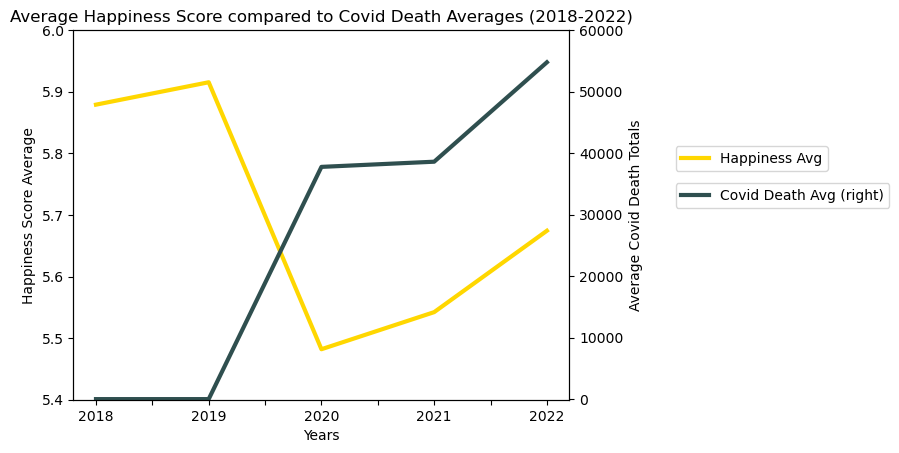

In [234]:

ax = hypo_df2.plot(kind = 'line', x = "Years",
                  y = "Happiness Avg", ylabel = "Happiness Score Average", color = 'Gold',
                  ylim = [5.4,6], linewidth = 3, legend="lower right")
 
ax2 = hypo_df2.plot(kind = 'line', x = "Years",
                   y = "Covid Death Avg", ylabel = "Average Covid Death Totals", secondary_y = True,
                    ylim = [-100,60000], color = 'darkslategray',  linewidth = 3,
                   ax = ax, legend="lower right")

ax.legend(bbox_to_anchor=(1.20,0.6),loc="lower left")
ax2.legend(bbox_to_anchor=(1.20,0.5),loc="lower left")

plt.title("Average Happiness Score compared to Covid Death Averages (2018-2022)")
plt.show()

In [127]:
merged2022df.loc[(merged2022df["Country"] == "United States")]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Start of the Year: Covid Deaths,End of the Year: Covid Deaths
14,United States,16,6.977,1.982,0.628,0.574,825870,1092764


In [134]:
us18 = short18_20cdf.loc[(short18_20cdf["Country"] == "United States")]
hapus18 = float(us18["Happiness Score"])

us19 = short19_20cdf.loc[(short19_20cdf["Country"] == "United States")]
hapus19 = float(us19["Happiness Score"])

us20 = merged2020df.loc[(merged2020df["Country"] == "United States")]
hapus20 = float(us20["Happiness Score"])
cdus20 = float(us20["End of the Year: Covid Deaths"])

us21 = merged2021df.loc[(merged2021df["Country"] == "United States")]
hapus21 = float(us21["Happiness Score"])
cdus21 = float(us21["End of the Year: Covid Deaths"])

us22 = merged2022df.loc[(merged2022df["Country"] == "United States")]
hapus22 = float(us22["Happiness Score"])
cdus22 = float(us22["End of the Year: Covid Deaths"])

In [136]:
hypo_dfus= pd.DataFrame({"Years":["2018","2019","2020","2021","2022"],
                         "Happiness Score":[hapus18, hapus19, hapus20, hapus21, hapus22], 
                         "Total Covid Deaths":[0,0, cdus20, cdus21, cdus22]})
hypo_dfus

,Years,Happiness Score,Total Covid Deaths
0,2018,6.8860,0.0
1,2019,6.8920,0.0
2,2020,6.9396,825468.0
3,2021,6.9510,825468.0
4,2022,6.9770,1092764.0


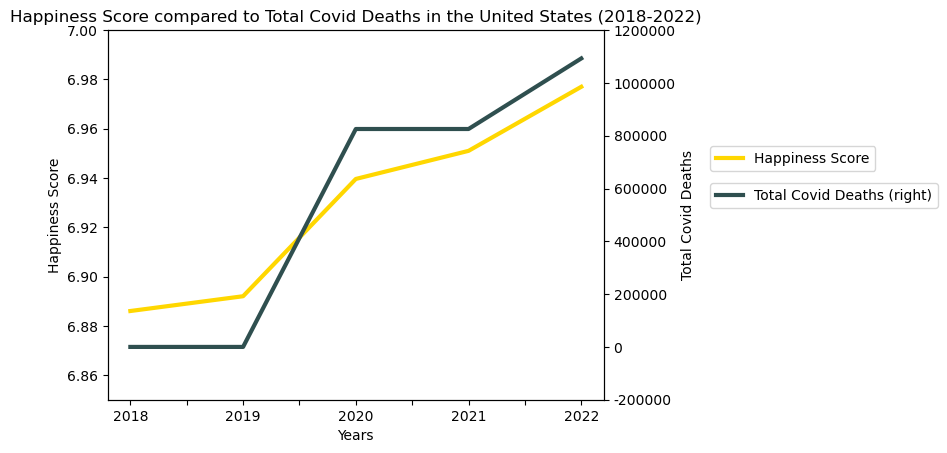

In [235]:
ax = hypo_dfus.plot(kind = 'line', x = "Years",
                  y = "Happiness Score", ylabel = "Happiness Score",
                    ylim = [6.85,7], color = 'Gold', linewidth = 3)
ax2 = hypo_dfus.plot(kind = 'line', x = "Years",
                   y = "Total Covid Deaths", secondary_y = True,
                   ylabel = "Total Covid Deaths", color = 'darkslategray',  linewidth = 3,
                   ylim = [-100,1200000], ax = ax)

ax.legend(bbox_to_anchor=(1.20,0.6),loc="lower left")
ax2.legend(bbox_to_anchor=(1.20,0.5),loc="lower left")

current_values = ax2.get_yticks()
ax2.yaxis.set_ticks(current_values)
ax2.yaxis.set_ticklabels(["{:.0f}".format(x) for x in current_values])

plt.title("Happiness Score compared to Total Covid Deaths in the United States (2018-2022)")
plt.show()

## Guys... We got happier... how sick are we?? lol

### Question 1
What is the correlation to happiness scores and life expectancy?
scatterplots 18, 20, 22

### Question 2
What is the correlation between happiness scores and freedom of choices?

### Question 3
What is the correlation between happiness scores and the GDP?